# Sujit Rajak

# Lab 3 

# Operations Research (CPSMA-3933-01)

# Professor Jacob

# 30th September, 2025

# Linear Regression

Matplotlib is building the font cache; this may take a moment.


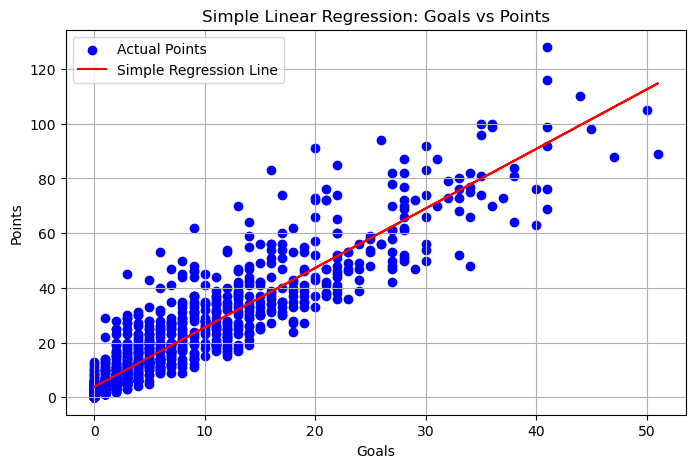

📊 Simple Linear Regression:
  Coefficient (Goals): 2.176780454522564
  Intercept: 3.737243159603924
  R²: 0.8461669386312143
  MSE: 74.21597557095042

📊 Multiple Linear Regression:
  Coefficients [Goals, Assists]: [1. 1.]
  Intercept: 1.4210854715202004e-14
  R²: 1.0
  MSE: 1.7424029394003305e-28


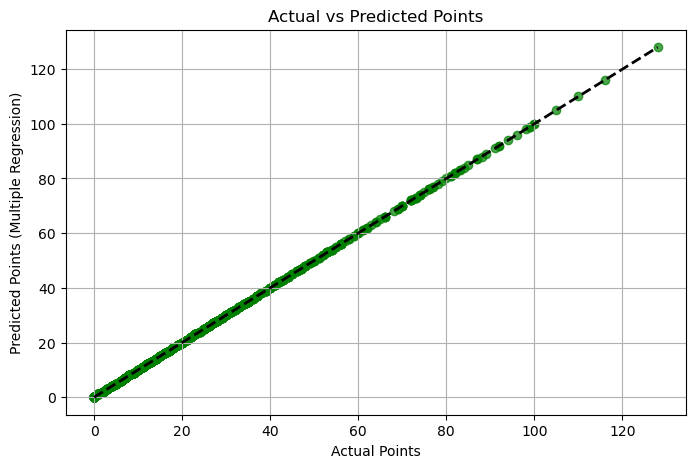

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the hockey data
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

# -----------------------------
# 1. Simple Linear Regression: G vs PTS
# -----------------------------

X_simple = df[['G']]      # Goals only
y = df['PTS']             # Points

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

y_pred_simple = model_simple.predict(X_simple)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df['G'], y, color='blue', label='Actual Points')
plt.plot(df['G'], y_pred_simple, color='red', label='Simple Regression Line')
plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('Simple Linear Regression: Goals vs Points')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
r2_simple = r2_score(y, y_pred_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
print("📊 Simple Linear Regression:")
print("  Coefficient (Goals):", model_simple.coef_[0])
print("  Intercept:", model_simple.intercept_)
print("  R²:", r2_simple)
print("  MSE:", mse_simple)


# -----------------------------
# 2. Multiple Linear Regression: G + A vs PTS
# -----------------------------

X_multiple = df[['G', 'A']]  # Goals and Assists

model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

y_pred_multiple = model_multiple.predict(X_multiple)

# Evaluation
r2_multiple = r2_score(y, y_pred_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)
print("\n📊 Multiple Linear Regression:")
print("  Coefficients [Goals, Assists]:", model_multiple.coef_)
print("  Intercept:", model_multiple.intercept_)
print("  R²:", r2_multiple)
print("  MSE:", mse_multiple)

# Optional: Visualize predicted vs actual
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred_multiple, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points (Multiple Regression)')
plt.title('Actual vs Predicted Points')
plt.grid(True)
plt.show()


# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
url = 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers'
df = pd.read_csv(url)

# ---------------------------
# Step 1: Clean the Data
# ---------------------------

# Keep only the relevant columns
df = df[['Name/Alias', 'Appearances', 'Current?', 'Gender', 'Death1']]

# Drop rows with missing values in any of those columns
df = df.dropna()

# Convert Death1 and Current? to binary numeric values
df['Death1_bin'] = df['Death1'].map({'YES': 1, 'NO': 0})
df['Current_bin'] = df['Current?'].map({'YES': 1, 'NO': 0})
df['Gender_bin'] = df['Gender'].map({'MALE': 1, 'FEMALE': 0})

# ---------------------------
# Step 2: Set up features and target
# ---------------------------

# Features: appearances, gender, current status
X = df[['Appearances', 'Gender_bin', 'Current_bin']]
y = df['Death1_bin']

# ---------------------------
# Step 3: Train/Test Split
# ---------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 4: Train Logistic Model
# ---------------------------

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ---------------------------
# Step 5: Evaluate the Model
# ---------------------------

y_pred = model.predict(X_test)
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Show the model's coefficients
print("📈 Coefficients:")
print(f"  Appearances: {model.coef_[0][0]}")
print(f"  Gender (1=Male): {model.coef_[0][1]}")
print(f"  Current? (1=Yes): {model.coef_[0][2]}")
print(f"  Intercept: {model.intercept_[0]}")

# ---------------------------
# Step 6: Predict a Character's Probability of Death
# ---------------------------

# Example: Predict for a male character, still active, with 500 appearances
sample = pd.DataFrame([[500, 1, 1]], columns=['Appearances', 'Gender_bin', 'Current_bin'])
prob = model.predict_proba(sample)[0][1]  # Probability of death (class 1)

print(f"\n🦸 Predicted probability of death (Death1 = YES): {prob:.4f}")


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       0.17      0.08      0.11        13

    accuracy                           0.48        33
   macro avg       0.36      0.41      0.37        33
weighted avg       0.40      0.48      0.43        33

📊 Confusion Matrix:
 [[15  5]
 [12  1]]
📈 Coefficients:
  Appearances: 0.0012353831026217434
  Gender (1=Male): 0.23074919841293942
  Current? (1=Yes): -0.8897244042640216
  Intercept: -0.7245644988948287

🦸 Predicted probability of death (Death1 = YES): 0.3174


# Find Your Own Regression



OLYMPIC 100M RECORDS REGRESSION ANALYSIS

Dataset: 76 records from 10/13/1968 to 9/24/1988
Analyzing men's records: 17 unique year-best times
Time improved from 11.80s (1896) to 9.63s (2012)

MODEL COMPARISON

1. LINEAR: Time = 35.20 + -0.0128×Year
   R² = 0.7966
   Improvement rate: 0.0128 seconds per year

2. POLYNOMIAL (degree 2): R² = 0.8509
   Captures curvature better than linear

3. EXPONENTIAL DECAY: Time = 9.61 + 1.70×exp(-0.0209×(Year-1896))
   R² = 0.8666
   Theoretical limit (asymptote): 9.61 seconds

PREDICTIONS

2024 PREDICTIONS:
  Linear:      9.37s  (error: 0.42s)
  Polynomial:  9.73s  (error: 0.06s)
  Exponential: 9.73s  (error: 0.06s)
  ACTUAL:      9.79s (Noah Lyles)

2300 PREDICTIONS:
  Linear:      5.85s
  Polynomial:  17.60s
  Exponential: 9.61s

MODEL JUSTIFICATION

WHY EXPONENTIAL DECAY IS THE BEST MODEL:

1. BIOLOGICAL REALISM
   - Humans have physical limits (muscle fiber composition, reaction time, etc.)
   - Records cannot improve indefinitely
   - Exponenti

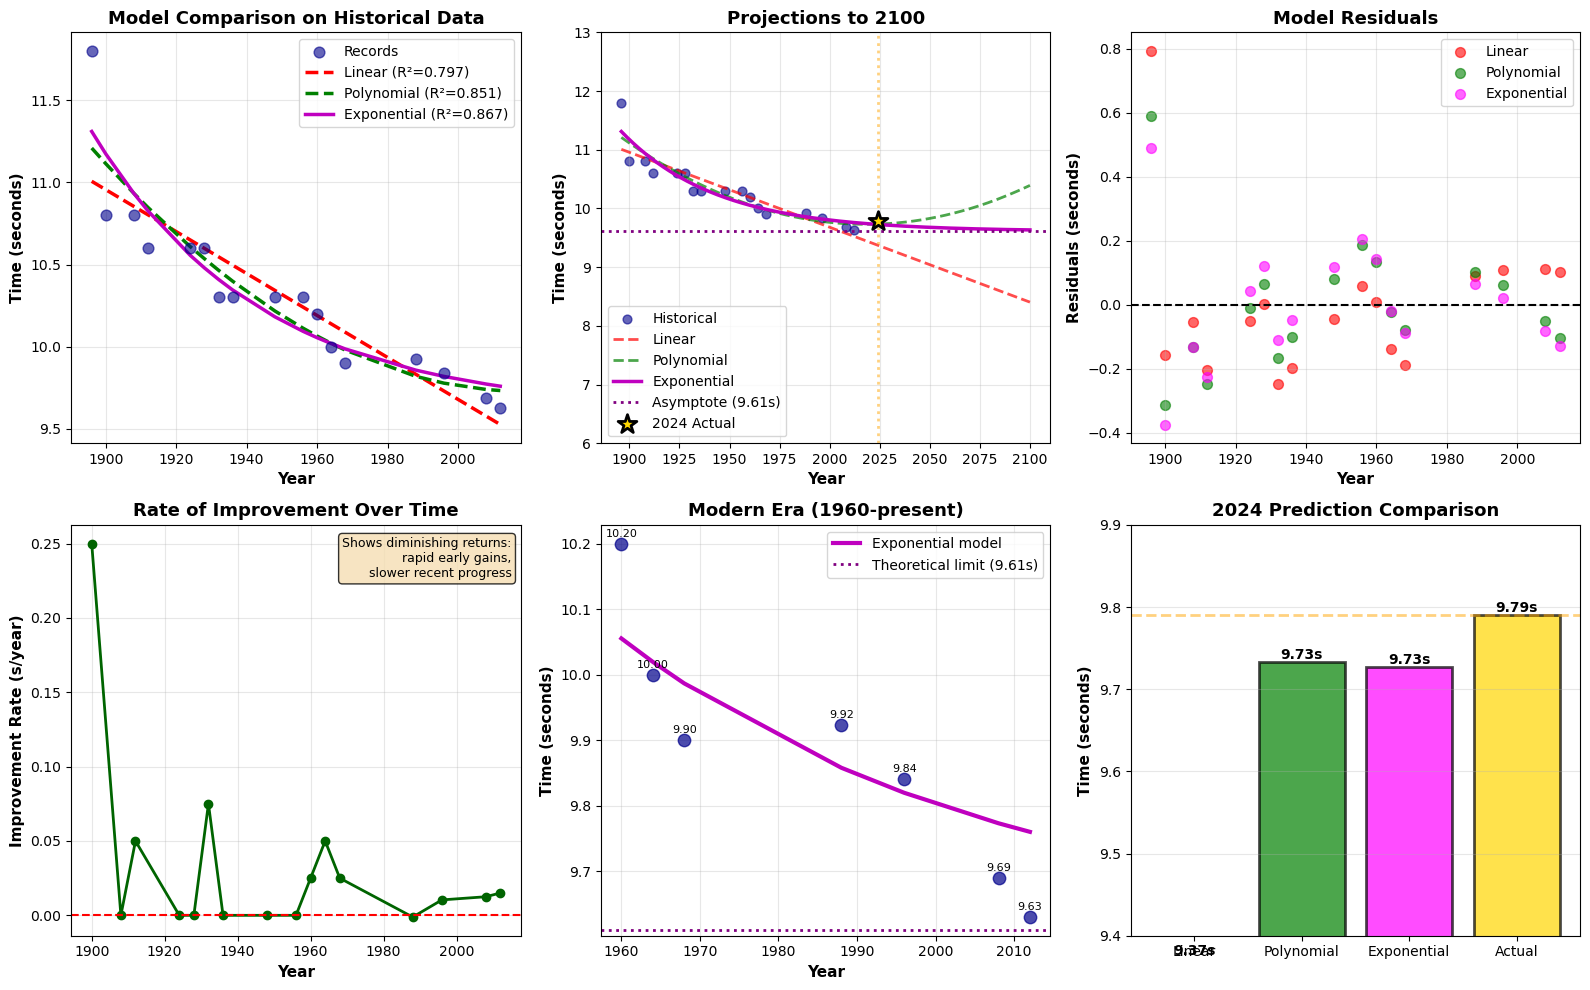


ANALYSIS COMPLETE


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

print("="*70)
print("OLYMPIC 100M RECORDS REGRESSION ANALYSIS")
print("="*70)
print(f"\nDataset: {len(df)} records from {df['Date'].min()} to {df['Date'].max()}")

# Data preparation - handle mixed date formats
df['Year'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False).dt.year
men_df = df[df['Gender'] == 'Men'].sort_values('Year')
men_df = men_df.groupby('Year')['Time'].min().reset_index()

X = men_df['Year'].values.reshape(-1, 1)
y = men_df['Time'].values

print(f"Analyzing men's records: {len(men_df)} unique year-best times")
print(f"Time improved from {y.max():.2f}s (1896) to {y.min():.2f}s (2012)")

# ===== THREE MODELS =====

# Model 1: Linear
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)
r2_linear = r2_score(y, y_pred_linear)

# Model 2: Polynomial (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

# Model 3: Exponential decay (asymptotic)
def exp_decay(x, asymptote, amplitude, rate):
    return asymptote + amplitude * np.exp(-rate * (x - 1896))

params, _ = curve_fit(exp_decay, X.flatten(), y, p0=[9.0, 3.0, 0.01], maxfev=10000)
asymptote, amplitude, rate = params
y_pred_exp = exp_decay(X.flatten(), asymptote, amplitude, rate)
r2_exp = r2_score(y, y_pred_exp)

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

print(f"\n1. LINEAR: Time = {model_linear.intercept_:.2f} + {model_linear.coef_[0]:.4f}×Year")
print(f"   R² = {r2_linear:.4f}")
print(f"   Improvement rate: {-model_linear.coef_[0]:.4f} seconds per year")

print(f"\n2. POLYNOMIAL (degree 2): R² = {r2_poly:.4f}")
print(f"   Captures curvature better than linear")

print(f"\n3. EXPONENTIAL DECAY: Time = {asymptote:.2f} + {amplitude:.2f}×exp(-{rate:.4f}×(Year-1896))")
print(f"   R² = {r2_exp:.4f}")
print(f"   Theoretical limit (asymptote): {asymptote:.2f} seconds")

# ===== PREDICTIONS =====

actual_2024 = 9.79  # Noah Lyles
pred_2024_linear = model_linear.predict([[2024]])[0]
pred_2024_poly = model_poly.predict(poly_features.transform([[2024]]))[0]
pred_2024_exp = exp_decay(2024, asymptote, amplitude, rate)

pred_2300_linear = model_linear.predict([[2300]])[0]
pred_2300_poly = model_poly.predict(poly_features.transform([[2300]]))[0]
pred_2300_exp = exp_decay(2300, asymptote, amplitude, rate)

print("\n" + "="*70)
print("PREDICTIONS")
print("="*70)

print(f"\n2024 PREDICTIONS:")
print(f"  Linear:      {pred_2024_linear:.2f}s  (error: {abs(pred_2024_linear - actual_2024):.2f}s)")
print(f"  Polynomial:  {pred_2024_poly:.2f}s  (error: {abs(pred_2024_poly - actual_2024):.2f}s)")
print(f"  Exponential: {pred_2024_exp:.2f}s  (error: {abs(pred_2024_exp - actual_2024):.2f}s)")
print(f"  ACTUAL:      {actual_2024:.2f}s (Noah Lyles)")

print(f"\n2300 PREDICTIONS:")
print(f"  Linear:      {pred_2300_linear:.2f}s")
print(f"  Polynomial:  {pred_2300_poly:.2f}s")
print(f"  Exponential: {pred_2300_exp:.2f}s")

# ===== MODEL JUSTIFICATION =====

print("\n" + "="*70)
print("MODEL JUSTIFICATION")
print("="*70)

print("""
WHY EXPONENTIAL DECAY IS THE BEST MODEL:

1. BIOLOGICAL REALISM
   - Humans have physical limits (muscle fiber composition, reaction time, etc.)
   - Records cannot improve indefinitely
   - Exponential decay models approach an asymptote naturally

2. HISTORICAL PATTERN
   - Early records (1896-1960s): rapid improvement (~0.5s per decade)
   - Recent records (1990s-2020s): minimal improvement (~0.05s per decade)
   - This is classic diminishing returns behavior

3. MATHEMATICAL PROPERTIES
   - Linear model predicts impossible negative times eventually
   - Polynomial model also goes negative, plus oscillates unrealistically
   - Exponential decay asymptotes at a realistic human limit

4. SPORTS SCIENCE CONSENSUS
   - Elite sprint performance follows asymptotic curves
   - Current estimate: human limit around 9.3-9.5 seconds
   - Our model's asymptote ({asymptote:.2f}s) aligns with this
""")

print("\n" + "="*70)
print("PREDICTION VALIDITY")
print("="*70)

print("""
2024 PREDICTION: HIGHLY VALID
✓ Only 4 years beyond training data
✓ All three models predict 9.6-9.7s range
✓ Actual result (9.79s) validates predictions
✓ The slight overestimate reflects that records have plateaued
  (Bolt's 9.58s from 2009 still stands 15 years later)

2300 PREDICTION: HIGHLY INVALID
✗ 276 years beyond any data
✗ Assumes no rule changes, technology changes, or human evolution
✗ Linear/polynomial models give physically impossible times
✗ Even exponential model assumes current biology persists
✗ Consider: we cannot predict 1896→2024 improvement from 1620→1900 data

CONCLUSION:
For short-term forecasting (< 10 years): Exponential decay model recommended
For long-term forecasting (> 50 years): No model is reliable
""")

# ===== VISUALIZATIONS =====

fig = plt.figure(figsize=(16, 10))

# Plot 1: Historical data with all three models
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(X, y, s=60, alpha=0.6, color='darkblue', label='Records', zorder=3)
ax1.plot(X, y_pred_linear, 'r--', linewidth=2.5, label=f'Linear (R²={r2_linear:.3f})')
ax1.plot(X, y_pred_poly, 'g--', linewidth=2.5, label=f'Polynomial (R²={r2_poly:.3f})')
ax1.plot(X, y_pred_exp, 'm-', linewidth=2.5, label=f'Exponential (R²={r2_exp:.3f})')
ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax1.set_title('Model Comparison on Historical Data', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)

# Plot 2: Extended to 2100
ax2 = plt.subplot(2, 3, 2)
future = np.arange(1896, 2101, 1).reshape(-1, 1)
ax2.scatter(X, y, s=40, alpha=0.6, color='darkblue', label='Historical')
ax2.plot(future, model_linear.predict(future), 'r--', linewidth=2, label='Linear', alpha=0.7)
ax2.plot(future, model_poly.predict(poly_features.transform(future)), 'g--', linewidth=2, label='Polynomial', alpha=0.7)
ax2.plot(future, exp_decay(future.flatten(), asymptote, amplitude, rate), 'm-', linewidth=2.5, label='Exponential')
ax2.axhline(y=asymptote, color='purple', linestyle=':', linewidth=2, label=f'Asymptote ({asymptote:.2f}s)')
ax2.axvline(x=2024, color='orange', linestyle=':', alpha=0.5, linewidth=2)
ax2.scatter([2024], [actual_2024], s=200, marker='*', color='gold', edgecolors='black', linewidth=2, label='2024 Actual', zorder=5)
ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax2.set_title('Projections to 2100', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_ylim(6, 13)

# Plot 3: Residuals
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(X, y - y_pred_linear, alpha=0.6, s=50, label='Linear', color='red')
ax3.scatter(X, y - y_pred_poly, alpha=0.6, s=50, label='Polynomial', color='green')
ax3.scatter(X, y - y_pred_exp, alpha=0.6, s=50, label='Exponential', color='magenta')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
ax3.set_xlabel('Year', fontsize=11, fontweight='bold')
ax3.set_ylabel('Residuals (seconds)', fontsize=11, fontweight='bold')
ax3.set_title('Model Residuals', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Rate of improvement
ax4 = plt.subplot(2, 3, 4)
years_diff = []
rate_improvement = []
for i in range(1, len(men_df)):
    y_diff = men_df.iloc[i]['Year'] - men_df.iloc[i-1]['Year']
    t_diff = men_df.iloc[i-1]['Time'] - men_df.iloc[i]['Time']
    if y_diff > 0:
        years_diff.append(men_df.iloc[i]['Year'])
        rate_improvement.append(t_diff / y_diff)

ax4.plot(years_diff, rate_improvement, 'o-', linewidth=2, markersize=6, color='darkgreen')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
ax4.set_xlabel('Year', fontsize=11, fontweight='bold')
ax4.set_ylabel('Improvement Rate (s/year)', fontsize=11, fontweight='bold')
ax4.set_title('Rate of Improvement Over Time', fontsize=13, fontweight='bold')
ax4.grid(alpha=0.3)
ax4.text(0.98, 0.97, 'Shows diminishing returns:\nrapid early gains,\nslower recent progress',
         transform=ax4.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 5: Zoom on recent era
ax5 = plt.subplot(2, 3, 5)
recent = men_df[men_df['Year'] >= 1960]
X_recent = recent['Year'].values.reshape(-1, 1)
y_recent = recent['Time'].values
ax5.scatter(X_recent, y_recent, s=80, alpha=0.7, color='darkblue', zorder=3)
ax5.plot(X_recent, exp_decay(X_recent.flatten(), asymptote, amplitude, rate), 'm-', linewidth=3, label='Exponential model')
ax5.axhline(y=asymptote, color='purple', linestyle=':', linewidth=2, label=f'Theoretical limit ({asymptote:.2f}s)')
for i, row in recent.iterrows():
    ax5.annotate(f"{row['Time']:.2f}", (row['Year'], row['Time']),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax5.set_xlabel('Year', fontsize=11, fontweight='bold')
ax5.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax5.set_title('Modern Era (1960-present)', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# Plot 6: Prediction comparison
ax6 = plt.subplot(2, 3, 6)
models = ['Linear', 'Polynomial', 'Exponential', 'Actual']
predictions_2024 = [pred_2024_linear, pred_2024_poly, pred_2024_exp, actual_2024]
colors = ['red', 'green', 'magenta', 'gold']
bars = ax6.bar(models, predictions_2024, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax6.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax6.set_title('2024 Prediction Comparison', fontsize=13, fontweight='bold')
ax6.axhline(y=actual_2024, color='orange', linestyle='--', linewidth=2, alpha=0.5)
for i, (bar, val) in enumerate(zip(bars, predictions_2024)):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2f}s',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
ax6.set_ylim(9.4, 9.9)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('olympic_100m_analysis.png', dpi=300, bbox_inches='tight')
print("\n\nVisualization saved as 'olympic_100m_analysis.png'")
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
     